In [ ]:
## Step 1:import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#Step 2: Load Dataset
file_path = 'netflix1.csv'
df = pd.read_csv(file_path)

In [ ]:
##Step 3: Data Cleaning
##Identify and handle missing data, correct data types, and drop duplicates.
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

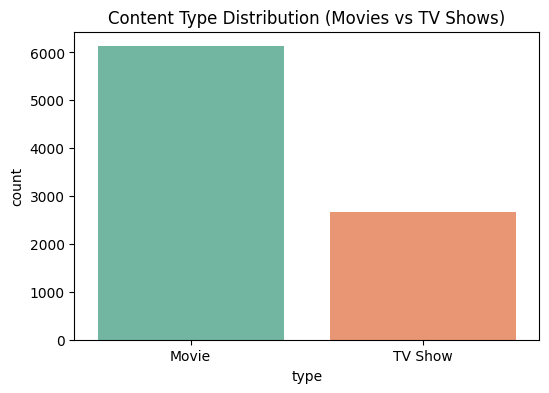

In [ ]:
##Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Content Type Distribution (Movies vs TV Shows)")
plt.show()

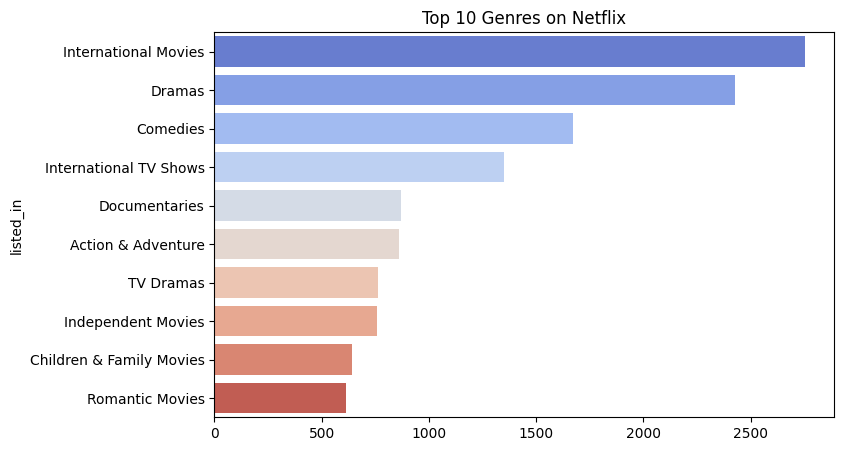

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,
    palette='coolwarm',
    dodge=False, legend=False
)
plt.title("Top 10 Genres on Netflix")
plt.show()

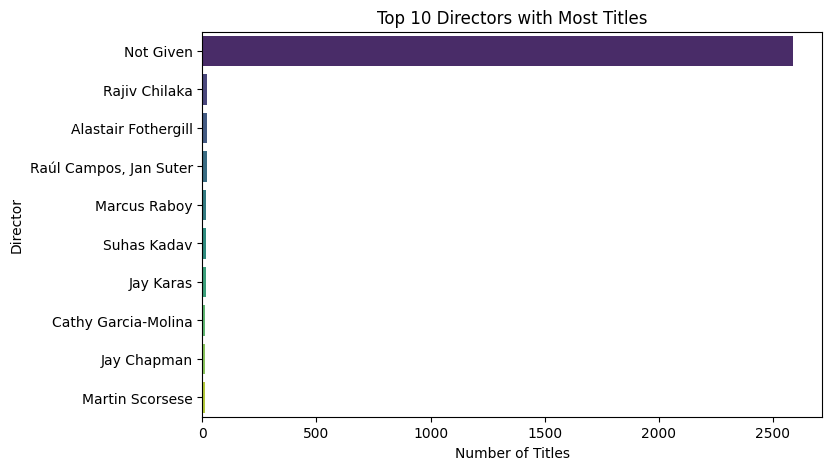

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

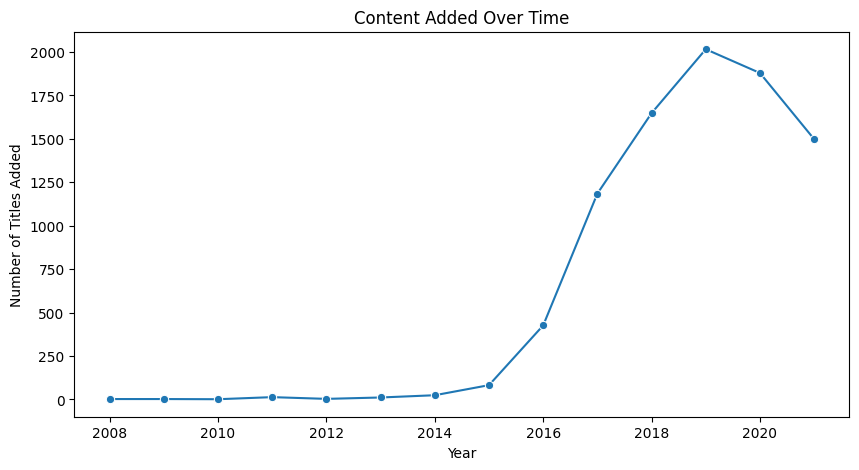

In [ ]:
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title("Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

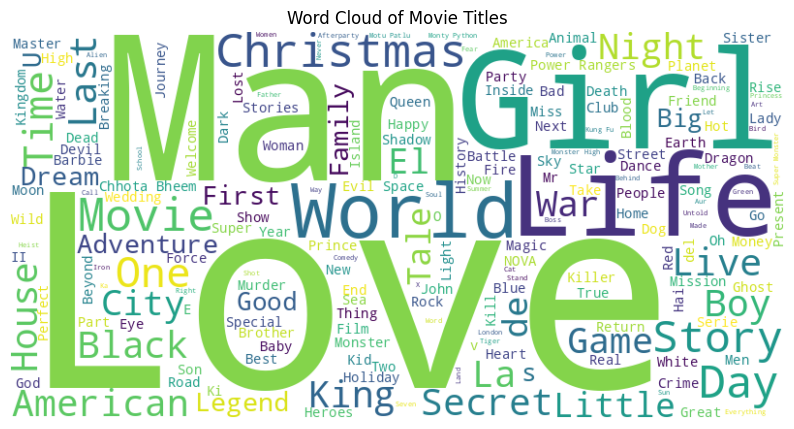

In [ ]:
movie_titles = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()

## **Step 5: Conclusion & Insights**

In this project, we worked with Netflix’s dataset and carried out a complete data cleaning and exploratory analysis.  

**Key Achievements**  
1. **Data Cleaning**  
   - Handled missing values by filling with appropriate defaults or modes.  
   - Removed duplicate entries to ensure data integrity.  
   - Converted date fields into proper `datetime` format for time-based analysis.  

2. **Exploratory Data Analysis (EDA)**  
   - Visualized the **distribution of Movies vs. TV Shows**, showing that Netflix’s catalog has a higher proportion of movies compared to TV shows.  
   - Identified the **top genres**, with drama, comedy, and action-related content dominating.  
   - Tracked **content addition trends over the years**, revealing a significant growth in titles during recent years, followed by some fluctuation.  
   - Highlighted the **top 10 directors** with the most titles in the dataset.  
   - Created a **word cloud** to visualize frequently occurring words in movie titles, uncovering common themes and trends in naming.  

**Insights Gained**  
- Netflix leans heavily towards **movie content**, but TV shows have been increasing in recent years.  
- **Drama and international content** appear prominently among the top genres, reflecting Netflix’s global strategy.  
- The surge in new content aligns with Netflix’s expansion phase into multiple markets.  
- Certain directors are notably prolific on the platform, suggesting strong partnerships or popular works.  


In [ ]:
##Step 6
df['num_genres'] = df['listed_in'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
def extract_duration(row):
    if pd.isnull(row['duration']):
        return None
    if 'min' in row['duration']:
        return int(row['duration'].replace(' min', '').strip())
    elif 'Season' in row['duration']:
        return row['duration']
    return None

df['duration_extracted'] = df.apply(extract_duration, axis=1)

df['is_international'] = df['country'].apply(lambda x: 0 if pd.notnull(x) and 'United States' in x else 1)

df[['title', 'listed_in', 'num_genres', 'duration', 'duration_extracted', 'is_international']].head()

,title,listed_in,num_genres,duration,duration_extracted,is_international
0,Dick Johnson Is Dead,Documentaries,1,90 min,90,0
1,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",3,1 Season,1 Season,1
2,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",3,1 Season,1 Season,0
3,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",2,91 min,91,1
4,Sankofa,"Dramas, Independent Movies, International Movies",3,125 min,125,0


<Axes: xlabel='num_genres', ylabel='count'>

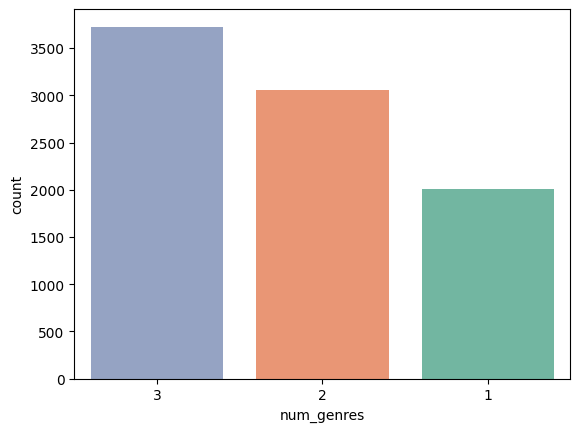

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of number of genres
sns.countplot(
    x='num_genres',
    data=df,
    hue='num_genres',
    legend=False,
    palette='Set2',
    order=df['num_genres'].value_counts().index
)

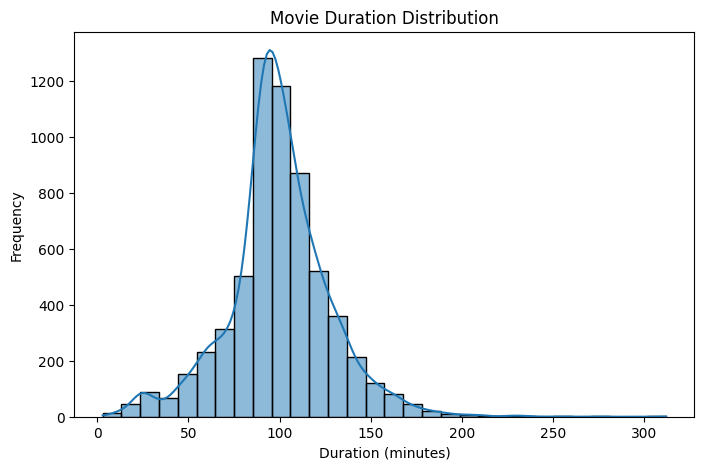

In [ ]:
# 2. Duration distribution for Movies
plt.figure(figsize=(8,5))
sns.histplot(df[df['type'] == 'Movie']['duration_extracted'].dropna(), bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='duration_extracted', ylabel='count'>

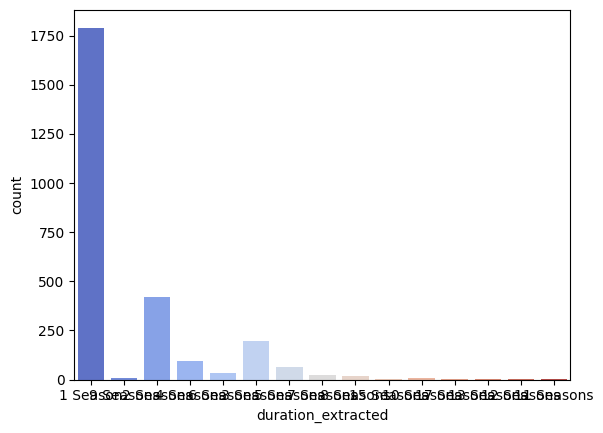

In [ ]:
# 3. TV Show seasons distribution
sns.countplot(
    x='duration_extracted',
    data=df[df['type'] == 'TV Show'],
    hue='duration_extracted',
    legend=False,
    palette='coolwarm'
)

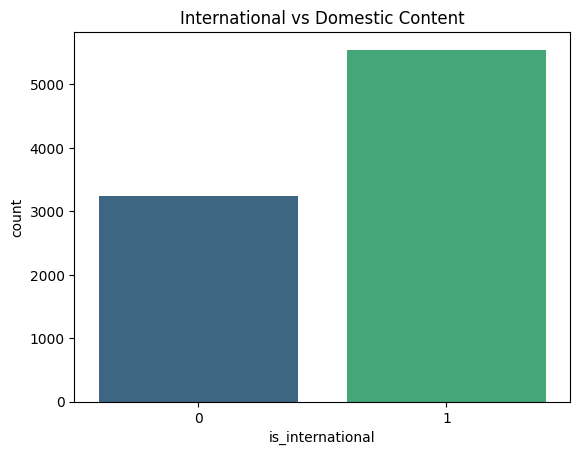

In [ ]:
# 4. International vs USA content
sns.countplot(
    x='is_international',
    data=df,
    hue='is_international',
    legend=False,
    palette='viridis'
)
plt.title("International vs Domestic Content")
plt.show()

In [ ]:
import datetime
current_year = datetime.datetime.now().year
df['content_age'] = current_year - df['release_year']
df['title_length'] = df['title'].apply(len)
df['season_count'] = df['duration'].apply(
    lambda x: int(x.split()[0]) if 'Season' in str(x) else None
)
df['has_multiple_directors'] = df['director'].apply(
    lambda x: True if ',' in str(x) else False
)

df[['title', 'release_year', 'content_age', 'title_length', 'season_count', 'has_multiple_directors']].head()

,title,release_year,content_age,title_length,season_count,has_multiple_directors
0,Dick Johnson Is Dead,2020,5,20,NaN,False
1,Ganglands,2021,4,9,1.0,False
2,Midnight Mass,2021,4,13,1.0,False
3,Confessions of an Invisible Girl,2021,4,32,NaN,False
4,Sankofa,1993,32,7,NaN,False


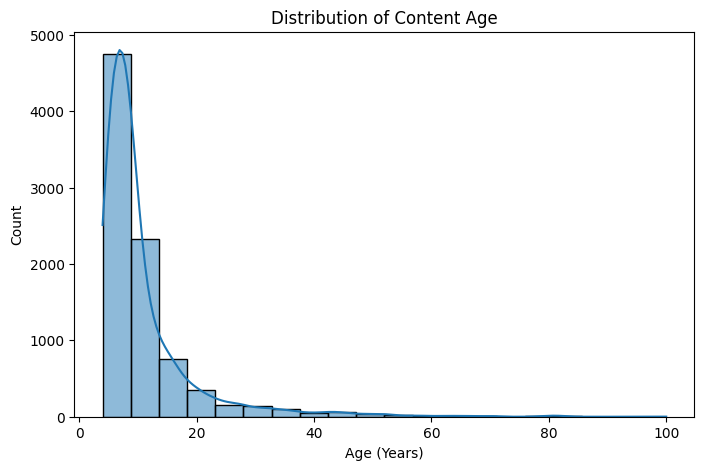

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of content age
plt.figure(figsize=(8,5))
sns.histplot(df['content_age'], bins=20, kde=True)
plt.title('Distribution of Content Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

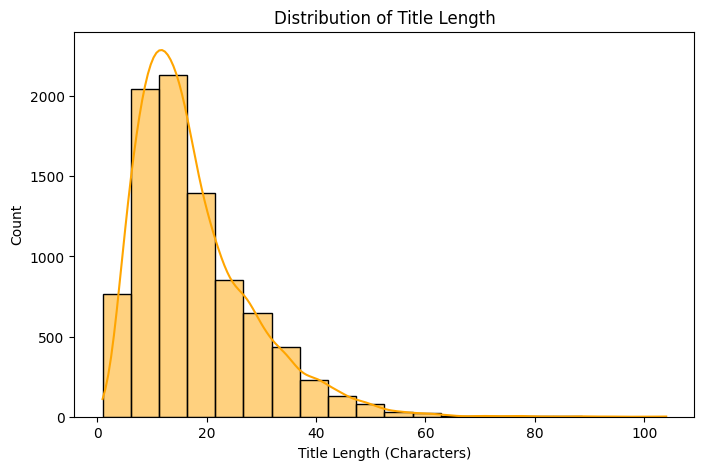

In [ ]:
# 2. Distribution of title length
plt.figure(figsize=(8,5))
sns.histplot(df['title_length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Title Length')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Count')
plt.show()

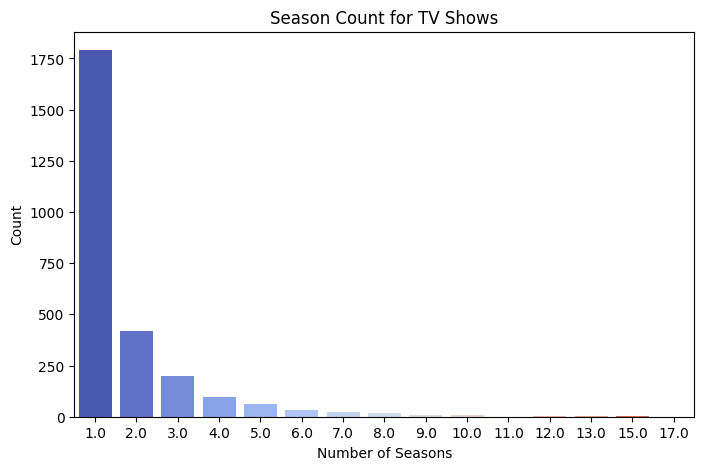

In [ ]:
# 3. Season count for TV Shows
plt.figure(figsize=(8,5))
sns.countplot(x='season_count', data=df[df['type'] == 'TV Show'], hue='season_count', palette='coolwarm', legend=False)
plt.title('Season Count for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

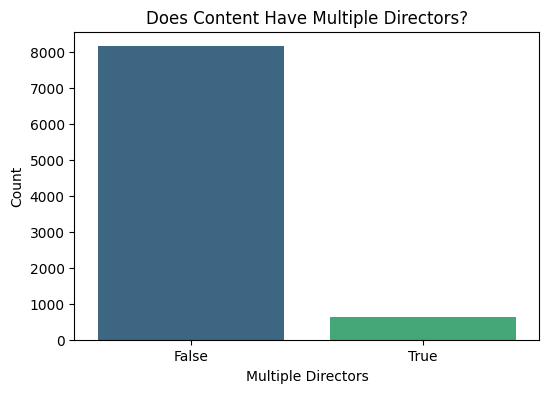

In [ ]:
# 4. Multiple directors check
plt.figure(figsize=(6,4))
sns.countplot(x='has_multiple_directors', data=df, hue='has_multiple_directors', palette='viridis', legend=False)
plt.title('Does Content Have Multiple Directors?')
plt.xlabel('Multiple Directors')
plt.ylabel('Count')
plt.show()

In [ ]:
df.to_csv("netflix_cleaned.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("netflix_cleaned.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,content_age,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,5,20
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",4,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",4,13
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",4,32
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",32,7


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'content_age',
       'title_length', 'recent'],
      dtype='object')

In [58]:
df['recent'] = df['release_year'].apply(lambda x: 1 if x >= 2020 else 0)

print(df[['release_year', 'recent']].head())

   release_year  recent
0          2020       1
1          2021       1
2          2021       1
3          2021       1
4          1993       0


In [60]:
features = ['num_genres', 'duration_extracted', 'is_international']
X = df[features]
y = df['recent']

In [65]:
df['recent'] = df['release_year'].apply(lambda x: 1 if x >= 2019 else 0)

features = ['num_genres', 'duration_extracted', 'is_international']
X = df[features]
y = df['recent']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6968145620022753

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81      1246
           1       0.43      0.12      0.19       512

    accuracy                           0.70      1758
   macro avg       0.57      0.53      0.50      1758
weighted avg       0.64      0.70      0.63      1758



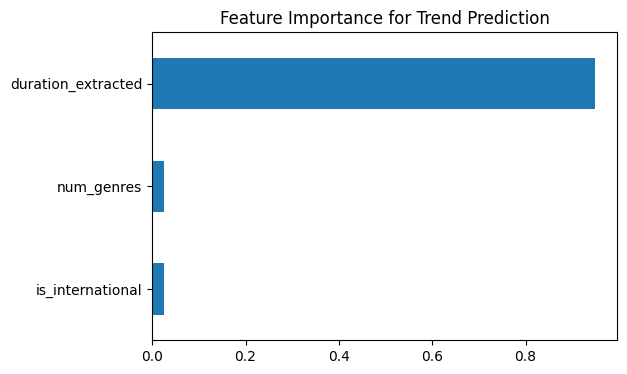

In [70]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title("Feature Importance for Trend Prediction")
plt.show()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

df['listed_in'] = df['listed_in'].fillna("")

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):

    idx = df.index[df['title'].str.lower() == title.lower()]
    if len(idx) == 0:
        return "Title not found in dataset."
    idx = idx[0]


    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    return df.iloc[movie_indices][['title', 'listed_in']]

print(get_recommendations("Breaking Bad"))

                    title                                listed_in
6925              Dare Me  Crime TV Shows, TV Dramas, TV Thrillers
7078        The Blacklist  Crime TV Shows, TV Dramas, TV Thrillers
7309                Ozark  Crime TV Shows, TV Dramas, TV Thrillers
7674  Designated Survivor  Crime TV Shows, TV Dramas, TV Thrillers
8319         Breaking Bad  Crime TV Shows, TV Dramas, TV Thrillers


In [75]:
# Save trained ML model (optional)
import joblib
joblib.dump(model, "trend_prediction_model.pkl")


['trend_prediction_model.pkl']

In [77]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("netflix_cleaned.csv")

year_counts = df['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
year_counts = year_counts.sort_values(by='release_year')

fig1 = px.line(
    year_counts,
    x='release_year',
    y='count',
    title='Netflix Content Release Trend Over Years',
    markers=True
)
fig1.show()

In [78]:
country_counts = df['country'].value_counts().head(15).reset_index()
country_counts.columns = ['country', 'count']

fig2 = px.bar(
    country_counts,
    x='country',
    y='count',
    title='Top 15 Countries Producing Netflix Content',
    color='count',
    color_continuous_scale='reds'
)
fig2.show()

In [79]:
df['genre_list'] = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in df['genre_list'].dropna() for genre in sublist]
genre_df = pd.Series(all_genres).value_counts().reset_index()
genre_df.columns = ['genre', 'count']

fig3 = px.treemap(
    genre_df,
    path=['genre'],
    values='count',
    title='Netflix Genre Popularity (Treemap)'
)
fig3.show()